# Kaggle: Airbnb New User Bookings
Page: https://www.kaggle.com/competitions/airbnb-recruiting-new-user-bookings/

## 資料科學專案流程參考
1. 定義問題／敘述  
2. 區分與整理 Train／Test 的資料集  
3. 進行資料的 EDA  
4. 進行假說設計／設定  
5. 清洗／整理資料  
6. 模型建置與預測  
7. 視覺化／報告撰寫／結果分析  
Reference: https://chriskang028.medium.com/a-step-by-step-guide-for-beginner-i-a1cb41bb87c1

## 1. 定義問題／敘述  
- 這個問題或比賽是如何產生的？It's a recruiting competition(招募競賽).  
- 他提供了哪一些資訊、資料與變數？  
- 這些變數是怎麼獲得的？  
- 這些資訊幫助我們理解什麼事情？  
- 這個比賽或問題的預期產出是什麼？預測新用戶將在哪個國家/地區進行首次預訂  
- 會對這個問題／比賽產生什麼 Impact？可以提供客製化內容,以降低首次預訂的平均時間  

### 選擇什麼方法？
1. 該問題是監督還是非監督學習？監督式學習  
2. 該問題的結果是分類還是回歸？分類

## 2. 區分與整理 Train／Test 的資料集

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("data/train_users_2.csv")
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [3]:
test = pd.read_csv("data/test_users.csv")
test.head() #test data和train data欄位差異:沒有country_destination欄位

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [4]:
sessions = pd.read_csv("data/sessions.csv")
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [5]:
countries = pd.read_csv("data/countries.csv")
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [6]:
age_gender_bkts = pd.read_csv("data/age_gender_bkts.csv")
age_gender_bkts.head()

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0


## 3. 進行資料的 EDA
EDA (Exploratory Data Analysis)  
1. 確認資料狀況
2. 建立觀察假說
3. 樞紐分析與視覺化

### 第一步：確認資料狀況
1. 檢視欄位的種類
2. 檢視資料的型態：名目/類別屬性、次序/順序屬性、等距/區間屬性、比率/比例屬性
3. 檢視錯誤與分布  
A. 確認數量變數df.describe()  
B. 確認類別變數df.describe() 調整想檢視的資料  
C. 檢視資料的差異與變化 ```countuniq = train.apply(lambda x: len(x.unique()))```

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       62096 non-null  object 
 1   date_account_created     62096 non-null  object 
 2   timestamp_first_active   62096 non-null  int64  
 3   date_first_booking       0 non-null      float64
 4   gender                   62096 non-null  object 
 5   age                      33220 non-null  float64
 6   signup_method            62096 non-null  object 
 7   signup_flow              62096 non-null  int64  
 8   language                 62096 non-null  object 
 9   affiliate_channel        62096 non-null  object 
 10  affiliate_provider       62096 non-null  object 
 11  first_affiliate_tracked  62076 non-null  object 
 12  signup_app               62096 non-null  object 
 13  first_device_type        62096 non-null  object 
 14  first_browser         

### 第二步：建立觀察假說
1. **假說**  


2. **清洗資料：修正資料、填補缺值、創造特徵、降維資料**  
A. test資料中```date_first_booking```完全沒有資料 → 可刪除  
B. gender資料中有```unknown``` → 調整為np.nan後填補值  

In [9]:
#確認遺漏值
train_missing_value = {}
for i in train.columns:
    if train[i].isnull().sum() != 0:
        train_missing_value[i] = "{:0.1f}%".format(train[i].isnull().sum() / train.shape[0] * 100)
print(train_missing_value)

test_missing_value = {}
for i in test.columns:
    if test[i].isnull().sum() != 0:
        test_missing_value[i] = "{:0.1f}%".format(test[i].isnull().sum() / test.shape[0] * 100)
print(test_missing_value)

{'date_first_booking': '58.3%', 'age': '41.2%', 'first_affiliate_tracked': '2.8%'}
{'date_first_booking': '100.0%', 'age': '46.5%', 'first_affiliate_tracked': '0.0%'}


### 第三步：樞紐分析與視覺化
1. 檢視資料的分布
2. 相關性矩陣檢視
3. 樞紐分析檢視

In [10]:
#To combine train and test datasets
df_train = train.drop("country_destination", axis=1)
df_total = pd.concat([df_train,test], axis=0, ignore_index=True) 
#ignore_index=True可以忽略合併時舊的index欄位, 改採用自動產生的index
df_total.shape

(275547, 15)

In [11]:
df_total.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome


In [12]:
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       275547 non-null  object 
 1   date_account_created     275547 non-null  object 
 2   timestamp_first_active   275547 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   275547 non-null  object 
 5   age                      158681 non-null  float64
 6   signup_method            275547 non-null  object 
 7   signup_flow              275547 non-null  int64  
 8   language                 275547 non-null  object 
 9   affiliate_channel        275547 non-null  object 
 10  affiliate_provider       275547 non-null  object 
 11  first_affiliate_tracked  269462 non-null  object 
 12  signup_app               275547 non-null  object 
 13  first_device_type        275547 non-null  object 
 14  firs

In [13]:
#Convert into datetime class
df_total['date_account_created'] = pd.to_datetime(df_total['date_account_created'])
df_total['timestamp_first_active'] = pd.to_datetime(df_total['timestamp_first_active'], format='%Y%m%d%H%M%S')

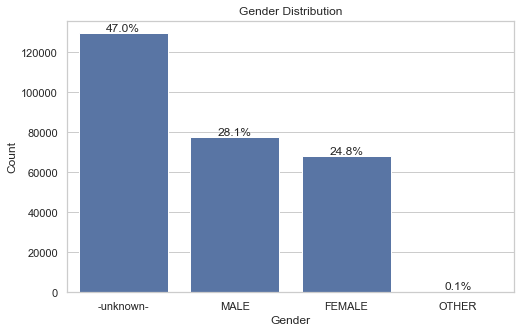

In [14]:
sns.set(style="whitegrid")
#Check gender distribution
plt.figure(figsize=(8,5))
x = df_total["gender"].unique()
y = df_total["gender"].value_counts()
sns.barplot(x, y, data=df_total, color=sns.color_palette()[0])
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
for i in range(y.shape[0]):
    text ="{:0.1f}%".format(y[i] / df_total.shape[0] * 100)
    plt.text(i, y[i]+1000, text, ha="center")
plt.show()

In [15]:
df_total["age"].describe()

count    158681.000000
mean         47.145310
std         142.629468
min           1.000000
25%          28.000000
50%          33.000000
75%          42.000000
max        2014.000000
Name: age, dtype: float64

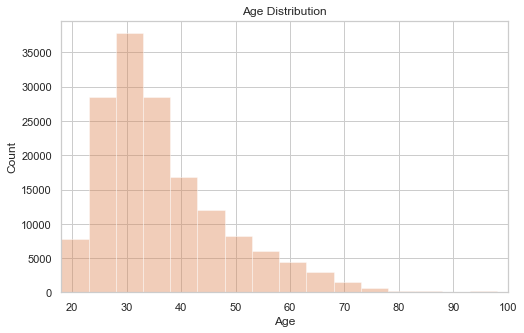

In [16]:
#age data看起來有outlier,可能是把年紀和西元放一起, 所以捨棄一些outlier轉為nan
df_total["age"] = df_total["age"].apply(lambda x: np.nan if x<15 or x>=100 else x)
#Check age distribution
plt.figure(figsize=(8,5))
sns.distplot(df_total["age"].dropna(), bins=np.arange(18,100+5,5), color=sns.color_palette()[1], kde=False)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution")
plt.xlim(18,100)
plt.show()

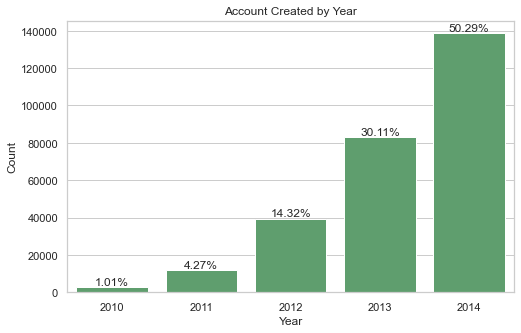

In [17]:
#Check date_account_created by year
plt.figure(figsize=(8,5))
created_year = df_total["date_account_created"].dt.year
x1 = sorted(created_year.unique())
y1 = df_total["date_account_created"].groupby(created_year).count()
sns.barplot(x1, y1, data=df_total, color=sns.color_palette()[2])
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Account Created by Year")
for i in range(y1.shape[0]):
    text ="{:0.2f}%".format(y1[x1[i]] / df_total.shape[0] * 100)
    plt.text(i, y1[x1[i]]+1000, text, ha="center")
plt.show()

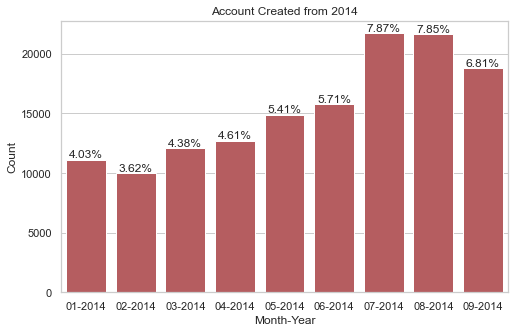

In [18]:
#Check date_account_created from 2014
plt.figure(figsize=(8,5))
account_2014 = df_total[df_total['date_account_created'].dt.year==2014]
monthyear14 = account_2014['date_account_created'].map(lambda x: x.strftime('%m-%Y'))
x2 = sorted(monthyear14.unique())
y2 = account_2014["date_account_created"].groupby(monthyear14).count()
sns.barplot(x2, y2, data=df_total, color=sns.color_palette()[3])
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Account Created from 2014")
for i in range(y2.shape[0]):
    text ="{:0.2f}%".format(y2[x2[i]] / df_total.shape[0] * 100)
    plt.text(i, y2[x2[i]]+200, text, ha="center")
plt.show()

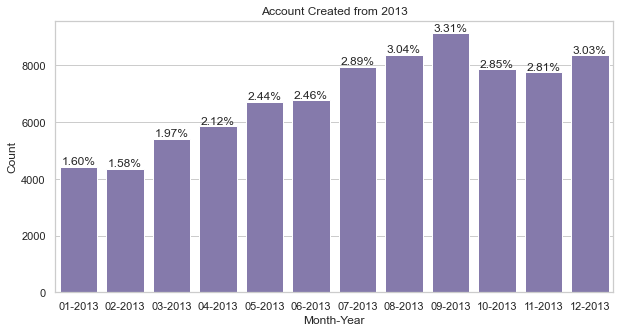

In [19]:
#Check date_account_created from 2013
plt.figure(figsize=(10,5))
account_2013 = df_total[df_total['date_account_created'].dt.year==2013]
monthyear13 = account_2013['date_account_created'].map(lambda x: x.strftime('%m-%Y'))
x3 = sorted(monthyear13.unique())
y3 = account_2013["date_account_created"].groupby(monthyear13).count()
sns.barplot(x3, y3, data=df_total, color=sns.color_palette()[4])
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Account Created from 2013")
for i in range(y3.shape[0]):
    text ="{:0.2f}%".format(y3[x3[i]] / df_total.shape[0] * 100)
    plt.text(i, y3[x3[i]]+80, text, ha="center")
plt.show()

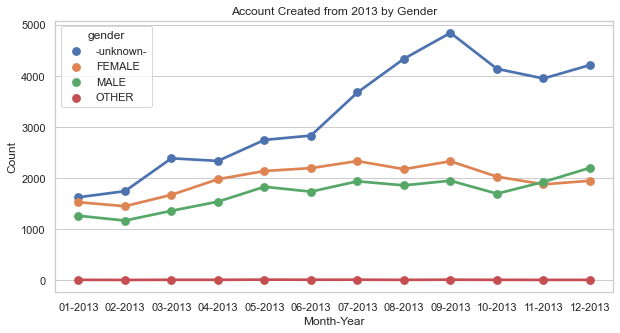

In [20]:
#Check date_account_created from 2013 split by gender
plt.figure(figsize=(10,5))
account_2013 = df_total[df_total["date_account_created"].dt.year==2013]
account_2013["monthyear13"] = account_2013["date_account_created"].map(lambda x: x.strftime('%m-%Y'))
account_2013 = account_2013.groupby(["monthyear13","gender"]).count()
account_2013.reset_index(inplace=True)
sns.pointplot(x="monthyear13", y="timestamp_first_active", hue="gender", data=account_2013)
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Account Created from 2013 by Gender")
plt.show()

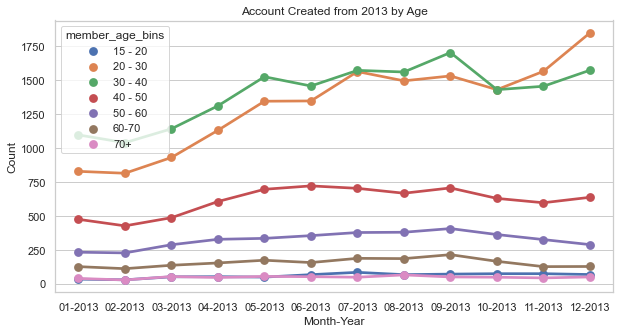

In [21]:
#Divide ages into various bins
df_total["member_age_bins"]=df_total["age"].apply(lambda x: '15 - 20' if 15<x<=20
                                                  else '20 - 30' if 20<x<=30
                                                  else '30 - 40' if 30<x<=40
                                                  else '40 - 50' if 40<x<=50
                                                  else '50 - 60' if 50<x<=60
                                                  else '60-70' if 60<x<=70
                                                  else '70+' if 70<x<=100
                                                  else np.nan)
#Check date_account_created from 2013 split by age
plt.figure(figsize=(10,5))
account_2013 = df_total[df_total["date_account_created"].dt.year==2013]
account_2013["monthyear13"] = account_2013["date_account_created"].map(lambda x: x.strftime('%m-%Y'))
account_2013 = account_2013.groupby(["monthyear13","member_age_bins"]).count()
account_2013.reset_index(inplace=True)
sns.pointplot(x="monthyear13", y="timestamp_first_active", hue="member_age_bins", data=account_2013)
plt.xlabel("Month-Year")
plt.ylabel("Count")
plt.title("Account Created from 2013 by Age")
plt.show()

### EDA筆記  
1. ```Gender```中```Unknown```資料最多, 且需處理此未知的資料
2. 從```2013```和```2014```註冊的帳號數量來看, 7-9月的註冊人數較多
3. 從年紀與2013各月註冊帳號數來看, 20-40歲的人數最多, 3-5月註冊有成長後5月開始趨緩

## 5. 清洗／整理資料
特徵工程（Feature Engineering）  
1. 檢查資料與確認缺失
2. 選擇模型或方法
3. 進行資料加工  
PS. 將資料copy一份副本後，以該份副本來編輯與處理

### 第一步：檢查資料與確認缺失
1. 是否有缺失值（Missing value）   
   <font color=#0000FF>"date_first_booking", "age", "first_affiliate_tracked" 這三個欄位有缺失值</font>   
2. 是否有極值或異常值（Outlier）  
   df.info() 確認資料總列數、資料欄位、資料型態、資料缺失  
   df.describe() 瞭解資料的分布，平均、眾數、標準差、最大、最小、四分位距等資料  
   <font color=#0000FF>從Age的資料分布看出有outlier(已處理)</font>  
   <font color=#0000FF>從Gender的資料分布看出有unknown資料占最多數</font>  
3. 資料分布是否符合常態（Normal Distribution）  
   使用 Matplotlib 快速繪圖，確認資料的分布狀況、是否有缺值、是否有稀疏資料的狀況（例如很多個 1 或 0）  
4. 資料是否需要清洗或變換（Clean Data）  
   <font color=#0000FF>是否需切分成年、月、日等不同欄位？"date_account_created", "timestamp_first_active"</font>  
   
### 第二步：選擇模型或方法
缺失值（Missing value）通常需要插值來補齊，舉例：簡單插值法（Simple Imputer）、K 最近鄰差值法（KNN Imputer）  

### 第三步：進行資料加工
<font color=#0000FF>待辦清單</font>
1. DataFrame.copy() 先複製出一份新的資料  
2. 將"date_account_created", "timestamp_first_active"切分成年、月、日  
3. 缺失值欄位 "date_first_booking" 直接drop  
4. 缺失值欄位 "age" 使用簡單插值法  
5. 缺失值欄位 "Gender" unknown 轉為 nan  
6. 剩餘缺失值使用 K最近鄰差值法 處理  

In [22]:
df_total.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,member_age_bins
0,gxn3p5htnn,2010-06-28,2009-03-19 04:32:55,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NaN
1,820tgsjxq7,2011-05-25,2009-05-23 17:48:09,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,30 - 40
2,4ft3gnwmtx,2010-09-28,2009-06-09 23:12:47,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,50 - 60
3,bjjt8pjhuk,2011-12-05,2009-10-31 06:01:29,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,40 - 50
4,87mebub9p4,2010-09-14,2009-12-08 06:11:05,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,40 - 50


In [23]:
df_total.info() #已處理age outlier並分群

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   id                       275547 non-null  object        
 1   date_account_created     275547 non-null  datetime64[ns]
 2   timestamp_first_active   275547 non-null  datetime64[ns]
 3   date_first_booking       88908 non-null   object        
 4   gender                   275547 non-null  object        
 5   age                      155901 non-null  float64       
 6   signup_method            275547 non-null  object        
 7   signup_flow              275547 non-null  int64         
 8   language                 275547 non-null  object        
 9   affiliate_channel        275547 non-null  object        
 10  affiliate_provider       275547 non-null  object        
 11  first_affiliate_tracked  269462 non-null  object        
 12  signup_app      

In [24]:
#1. DataFrame.copy() 先複製出一份新的資料
df_work = df_total.copy()
df_work = df_work.drop("member_age_bins", axis=1)

In [25]:
#2. 將"date_account_created", "timestamp_first_active"切分成年、月、日

#For "date_account_created"
date_account_created = np.vstack(df_work["date_account_created"].astype(str).apply(lambda x: list(map(int, x.split('-')))))
df_work["date_account_created_year"] = date_account_created[:,0]
df_work["date_account_created_month"] = date_account_created[:,1]
df_work["date_account_created_day"] = date_account_created[:,2]
#原本"date_account_created"欄位被切分後的資料取代,所以可以先移除
df_work = df_work.drop("date_account_created", axis=1)

#For "timestamp_first_active"
first_active = np.vstack(df_work["timestamp_first_active"].astype(str).apply(lambda x:list(map(int,[x[:4], x[5:7], x[8:10]]))))
df_work["first_active_year"] = first_active[:,0]
df_work["first_active_month"] = first_active[:,1]
df_work["first_active_day"] = first_active[:,2]
#原本"timestamp_first_active"欄位被切分後的資料取代,所以可以先移除
df_work = df_work.drop("timestamp_first_active", axis=1)

df_work.head()

,id,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_account_created_year,date_account_created_month,date_account_created_day,first_active_year,first_active_month,first_active_day
0,gxn3p5htnn,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,6,28,2009,3,19
1,820tgsjxq7,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,2011,5,25,2009,5,23
2,4ft3gnwmtx,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,2010,9,28,2009,6,9
3,bjjt8pjhuk,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,2011,12,5,2009,10,31
4,87mebub9p4,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,2010,9,14,2009,12,8


In [26]:
#3. 缺失值欄位 "date_first_booking" 直接drop
df_work = df_work.drop("date_first_booking", axis=1)

In [27]:
#4. 缺失值欄位 "age" 使用簡單插值法
from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=np.nan, strategy="mean") #缺失值由該列平均值填補
age = np.array(df_work["age"]).reshape(-1,1) #先轉換成2D
df_work["age"] = si.fit_transform(age).ravel()

In [28]:
#5. 缺失值欄位 "Gender" unknown 轉為 nan
df_work["gender"].replace("-unknown-", np.nan, inplace=True)

In [29]:
#6. 剩餘缺失值使用 K最近鄰差值法 處理
missing_value = [i for i in df_work.columns if df_work[i].isnull().sum()!=0]
missing_value

['gender', 'first_affiliate_tracked']

In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
encoder = LabelEncoder()
knn_imputer = KNNImputer(n_neighbors=3)
gender = encoder.fit_transform(df_work["gender"])
df_work["gender"] = knn_imputer.fit_transform(gender.reshape(-1,1)).ravel()
first_tracked = encoder.fit_transform(df_work["first_affiliate_tracked"])
df_work["first_affiliate_tracked"] = knn_imputer.fit_transform(first_tracked.reshape(-1,1)).ravel()

df_work.head()

,id,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,date_account_created_year,date_account_created_month,date_account_created_day,first_active_year,first_active_month,first_active_day
0,gxn3p5htnn,3.0,36.042328,facebook,0,en,direct,direct,6.0,Web,Mac Desktop,Chrome,2010,6,28,2009,3,19
1,820tgsjxq7,1.0,38.000000,facebook,0,en,seo,google,6.0,Web,Mac Desktop,Chrome,2011,5,25,2009,5,23
2,4ft3gnwmtx,0.0,56.000000,basic,3,en,direct,direct,6.0,Web,Windows Desktop,IE,2010,9,28,2009,6,9
3,bjjt8pjhuk,0.0,42.000000,facebook,0,en,direct,direct,6.0,Web,Mac Desktop,Firefox,2011,12,5,2009,10,31
4,87mebub9p4,3.0,41.000000,basic,0,en,direct,direct,6.0,Web,Mac Desktop,Chrome,2010,9,14,2009,12,8


## 6. 模型建置與預測<font color=#0000FF>(優化第一版)</font>

### 第一步：模型選擇（Model Selection）
筆記：[Python機器學習-多元分類的5種模型](https://medium.com/@imirene/python%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92-%E5%A4%9A%E5%85%83%E5%88%86%E9%A1%9E%E7%9A%845%E7%A8%AE%E6%A8%A1%E5%9E%8B-f7b6026c5ce6)  

#### 測試模型並比較
1. Support Vector Machine(SVM)  
2. Random Forest  
3. eXtreme Gradient Boosting(XGBoost)  

### 第二步：特徵預處理（Preprocessing）
- 常見的方式有：Label Encoder、One-Hot Encoder  
- 先使用<font color=#0000FF>One-Hot Encoding</font>測試  

In [31]:
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275547 entries, 0 to 275546
Data columns (total 18 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   id                          275547 non-null  object 
 1   gender                      275547 non-null  float64
 2   age                         275547 non-null  float64
 3   signup_method               275547 non-null  object 
 4   signup_flow                 275547 non-null  int64  
 5   language                    275547 non-null  object 
 6   affiliate_channel           275547 non-null  object 
 7   affiliate_provider          275547 non-null  object 
 8   first_affiliate_tracked     275547 non-null  float64
 9   signup_app                  275547 non-null  object 
 10  first_device_type           275547 non-null  object 
 11  first_browser               275547 non-null  object 
 12  date_account_created_year   275547 non-null  int32  
 13  date_account_c

In [32]:
#1. 選擇要轉換的columns
features = ["gender", "signup_method", "signup_flow", "language", "affiliate_channel", "affiliate_provider",
            "first_affiliate_tracked", "signup_app", "first_device_type", "first_browser"]

#2. 使用pd.get_dummies方法進行One-hot Encoding
for feature in features:
    df_dummy = pd.get_dummies(df_work[feature], prefix=feature) #perfix:String to append DataFrame column names
    df_work.drop(feature, axis=1, inplace=True)
    df_work = pd.concat([df_work, df_dummy], axis=1)

### 第三步：準備訓練／測試集（Train / Test Split）

In [33]:
#1. 先將特徵矩陣（自變數）與應變數區分出來
#整理資料時,train & test資料一起整理,現在再拆分開來
df_work = df_work.drop("id", axis=1)
x_train = df_work.iloc[:train.shape[0],:]
x_test = df_work.iloc[train.shape[0]:, :]
#train data中的"country_destination"為應變數
destination = train["country_destination"]
encoder = LabelEncoder()
y_train = encoder.fit_transform(destination)

In [34]:
#2. 區分訓練集與測試集
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=20)

### 第四步：訓練與評估模型（Model Training）

In [35]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier 
from sklearn.model_selection import GridSearchCV

### 模型1：Decision Tree
Scikit Learn 說明：[sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
- ```criterion```: The function to measure the quality of a split. “gini”, “entropy”, “log_loss” (default=”gini”)  
- ```max_depth```: The maximum depth of the tree. (default=None) 防止樹長得過高造成overfit  
- ```min_samples_leaf```: The minimum number of samples required to be at a leaf node. (default=1) leaf node最小sample數  
- ```max_features```: The number of features to consider when looking for the best split. 最多只能挑K種feature去分類

In [36]:
#1. 使用Decision Tree default參數預測
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=0)

In [37]:
print("Accuracy score for train data: ",dtc.score(X_train,Y_train))
print("Accuracy score for test data: ",dtc.score(X_test,Y_test))

Accuracy score for train data:  0.9540809155707258
Accuracy score for test data:  0.5099319132987694


In [38]:
#2. 調整參數
criterions = ["gini", "entropy", "log_loss"]
max_depths = [3, 5, 10, "None"]
param_grid = {"criterion":criterions, "max_depth":max_depths}
GSCV = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid, cv=5)
GSCV.fit(X_train,Y_train)
print("Accuracy score for train data: ",GSCV.score(X_train,Y_train))
print("Accuracy score for test data: ",GSCV.score(X_test,Y_test))
print("The best model parameters: ",GSCV.best_params_)

Accuracy score for train data:  0.630746578322123
Accuracy score for test data:  0.6305359485289525
The best model parameters:  {'criterion': 'gini', 'max_depth': 5}


### 模型2：Random Forest
Scikit Learn 說明：[sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  
- ```criterion```: The function to measure the quality of a split. “gini”, “entropy”, “log_loss” (default=”gini”)  
- ```n_estimators```: The number of trees in the forest. (default=100)  
- ```max_depth```: The maximum depth of the tree. (default=None)  
- ```n_jobs```: The number of jobs to run in parallel. (default=None)

In [39]:
#1. 使用Random Forest default參數預測
rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train,Y_train)

RandomForestClassifier(random_state=0)

In [40]:
print("Accuracy score for train data: ",rfc.score(X_train,Y_train))
print("Accuracy score for test data: ",rfc.score(X_test,Y_test))

Accuracy score for train data:  0.9540675300337985
Accuracy score for test data:  0.5826097819976264


In [40]:
#2. 調整參數
# criterions = ["gini", "entropy", "log_loss"] default="gini"
max_depths = [3, 5, 10, "None"]
n_estimators_list = [10, 20, 50, 100]
param_grid = {"n_estimators":n_estimators_list, "max_depth":max_depths}
GSCV = GridSearchCV(RandomForestClassifier(random_state=0), param_grid, cv=5)
GSCV.fit(X_train,Y_train)
print("Accuracy score for train data: ",GSCV.score(X_train,Y_train))
print("Accuracy score for test data: ",GSCV.score(X_test,Y_test))
print("The best model parameters: ",GSCV.best_params_)

Accuracy score for train data:  0.6156075360572901
Accuracy score for test data:  0.6092354300705853
The best model parameters:  {'max_depth': 10, 'n_estimators': 50}


### 模型3：XGBoost
XGBoost 說明：[Scikit-Learn API](https://xgboost.readthedocs.io/en/stable/python/python_api.html#module-xgboost.sklearn)  
- ```n_estimators```: Number of gradient boosted trees. (default=100)  
- ```max_depth```: Maximum tree depth for base learners. (default=6) 典型值: 3–10
- ```learning_rate```: Boosting learning rate. (default=0.3)
- ```n_jobs```: Number of parallel threads used to run xgboost.
- ```gamma```: 指定節點分裂所需的最小損失函數下降值
- ```subsample```: 控制對於每棵樹，隨機採樣的比例。減小這個參數的值，算法會更加保守，避免過擬合 (default=1) 典型值: 0.5–1
- ```colsample_bytree```: 用來控制每棵隨機採樣的列數的占比 (default=1) 典型值: 0.5–1

In [52]:
#1. 使用XGBoost default參數預測
xgb = XGBClassifier(n_estimators=100, learning_rate= 0.3, random_state=0)
xgb.fit(X_train,Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.3, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [42]:
print("Accuracy score for train data: ",xgb.score(X_train,Y_train))
print("Accuracy score for test data: ",xgb.score(X_test,Y_test))

Accuracy score for train data:  0.6496134926212228
Accuracy score for test data:  0.6351271159972516


In [44]:
#2. 調整參數
max_depths = [3, 5, 6, 10]
n_estimators_list = [10, 20, 50, 100]
train_score_list = []
test_score_list = []
for i in max_depths:
    for j in n_estimators_list:
        xgb = XGBClassifier(n_estimators=j, max_depth=i, random_state=0)
        xgb.fit(X_train,Y_train)
        train_score = xgb.score(X_train,Y_train)
        test_score = xgb.score(X_test,Y_test)
        train_score_list.append(train_score)
        test_score_list.append(test_score)
        print("max_depth={}, n_estimators={}, Accuracy(train): {}, Accuracy(test): {}".format(i,j,train_score,test_score))

max_depth=3, n_estimators=10, Accuracy(train): 0.6325737041127062, Accuracy(test): 0.6325660565931663
max_depth=3, n_estimators=20, Accuracy(train): 0.633711474751531, Accuracy(test): 0.6328471484789806
max_depth=3, n_estimators=50, Accuracy(train): 0.6355653716159689, Accuracy(test): 0.6340183646698732
max_depth=3, n_estimators=100, Accuracy(train): 0.6366897567178663, Accuracy(test): 0.6344400024985946
max_depth=5, n_estimators=10, Accuracy(train): 0.6357661546698792, Accuracy(test): 0.6345961646573802
max_depth=5, n_estimators=20, Accuracy(train): 0.6375932804604625, Accuracy(test): 0.6353769754513087
max_depth=5, n_estimators=50, Accuracy(train): 0.6405046347421611, Accuracy(test): 0.6363139484040228
max_depth=5, n_estimators=100, Accuracy(train): 0.6447143861058127, Accuracy(test): 0.6363139484040228
max_depth=6, n_estimators=10, Accuracy(train): 0.6381420874744839, Accuracy(test): 0.6342526079080517
max_depth=6, n_estimators=20, Accuracy(train): 0.6405648696583341, Accuracy(test)

max_depth        5.000000
n_estimators    50.000000
train_score      0.640505
test_score       0.636314
Name: 6, dtype: float64


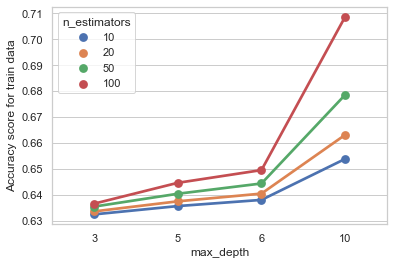

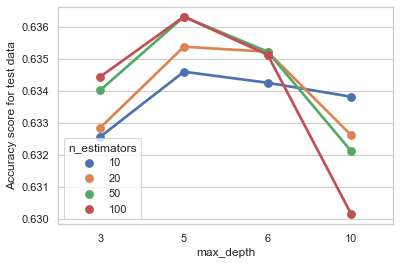

In [51]:
#找出較佳的accuracy score for test data
max_depths_list = [3]*4 +[5]*4 +[6]*4 +[10]*4
df_xgb = pd.DataFrame()
df_xgb["max_depth"] = max_depths_list
df_xgb["n_estimators"] = n_estimators_list*4
df_xgb["train_score"] = train_score_list
df_xgb["test_score"] = test_score_list
better_test_score = df_xgb.iloc[df_xgb["test_score"].argmax()]
print(better_test_score)

#劃出在不同max_depth和n_estimators下train_score和test_score的圖
sns.pointplot(x="max_depth", y="train_score", hue="n_estimators", data=df_xgb)
plt.xlabel("max_depth")
plt.ylabel("Accuracy score for train data")
plt.show()
sns.pointplot(x="max_depth", y="test_score", hue="n_estimators", data=df_xgb)
plt.xlabel("max_depth")
plt.ylabel("Accuracy score for test data")
plt.show()

In [53]:
#2. 調整參數-2
subsample = [0.5, 0.8, 1]
colsample_bytree = [0.5, 0.8, 1]
train_score_list = []
test_score_list = []
for i in subsample:
    for j in colsample_bytree:
        xgb = XGBClassifier(n_estimators=50, max_depth=5, subsample=i, colsample_bytree=j, random_state=0)
        xgb.fit(X_train,Y_train)
        train_score = xgb.score(X_train,Y_train)
        test_score = xgb.score(X_test,Y_test)
        train_score_list.append(train_score)
        test_score_list.append(test_score)
        print("subsample={}, colsample_bytree={}, Accuracy(train): {}, Accuracy(test): {}".format(i,j,train_score,test_score))

subsample=0.5, colsample_bytree=0.5, Accuracy(train): 0.6400696047920222, Accuracy(test): 0.6345805484415017
subsample=0.5, colsample_bytree=0.8, Accuracy(train): 0.6410400562192551, Accuracy(test): 0.6355643700418515
subsample=0.5, colsample_bytree=1, Accuracy(train): 0.6409865140715457, Accuracy(test): 0.6352051970766444
subsample=0.8, colsample_bytree=0.5, Accuracy(train): 0.6408928153130542, Accuracy(test): 0.6354238240989444
subsample=0.8, colsample_bytree=0.8, Accuracy(train): 0.6408727370076632, Accuracy(test): 0.6354550565307014
subsample=0.8, colsample_bytree=1, Accuracy(train): 0.6415888632332765, Accuracy(test): 0.6355487538259729
subsample=1, colsample_bytree=0.5, Accuracy(train): 0.6402770806143961, Accuracy(test): 0.6363451808357798
subsample=1, colsample_bytree=0.8, Accuracy(train): 0.6405314058160158, Accuracy(test): 0.6360640889499657
subsample=1, colsample_bytree=1, Accuracy(train): 0.6405046347421611, Accuracy(test): 0.6363139484040228


subsample           1.000000
colsample_bytree    0.500000
train_score         0.640277
test_score          0.636345
Name: 6, dtype: float64


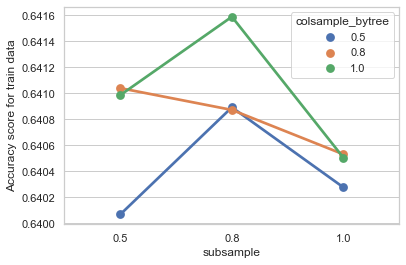

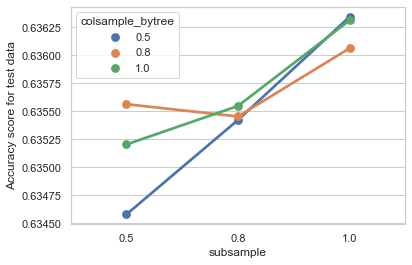

In [56]:
#找出較佳的accuracy score for test data
subsamples = [0.5]*3 +[0.8]*3 +[1]*3
df_xgb1 = pd.DataFrame()
df_xgb1["subsample"] = subsamples
df_xgb1["colsample_bytree"] = colsample_bytree*3
df_xgb1["train_score"] = train_score_list
df_xgb1["test_score"] = test_score_list
better_test_score = df_xgb1.iloc[df_xgb1["test_score"].argmax()]
print(better_test_score)

#劃出在不同subsample和colsample_bytree下train_score和test_score的圖
sns.pointplot(x="subsample", y="train_score", hue="colsample_bytree", data=df_xgb1)
plt.xlabel("subsample")
plt.ylabel("Accuracy score for train data")
plt.show()
sns.pointplot(x="subsample", y="test_score", hue="colsample_bytree", data=df_xgb1)
plt.xlabel("subsample")
plt.ylabel("Accuracy score for test data")
plt.show()

### 模型評估筆記
1. Decision Tree 的 Train data score 高於 Test data score, 有 over-fitting 現象(需要其他兩個模型來調整)
2. 以 default 參數預測的準確度: XGBoost > Random Forest > Decision Tree (訓練時間長短也是)  

<font color=#0000FF>選擇 XGBoost 模型來預測最終結果</font>  
調整參數過程的觀察：  
1. 增加 ```max_depth``` 和 ```n_estimators``` 可以提高 Train data score, 但在某個臨界值後 Test data score 會下降, 所以不一定越高越好, 會有 over-fitting 現象
2. 增加 ```subsample``` 可以提高 Test data score 

由上面的調整參數過程後, 先使用以下這組參數來做後續的預測 (調參數的過程真的滿花時間的!!)  
<font color=#0000FF>max_depth=5, n_estimators=50, subsample=1, colsample_bytree=0.5</font>  

In [57]:
xgb_f = XGBClassifier(max_depth=5, n_estimators=50, subsample=1, colsample_bytree=0.5)
xgb_f.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.5,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=50, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [58]:
print("Accuracy score for train data: ",xgb_f.score(x_train, y_train))

Accuracy score for train data:  0.6392661547615144


In [59]:
#Prediction
y_pred = xgb_f.predict_proba(x_test)

#將標準化後的資料轉換為原始資料
test_id = []
cities_list = []
for i in range(test.shape[0]):
    ids = [test["id"][i]]
    test_id += ids *3
    cities_list += encoder.inverse_transform(np.argsort(y_pred[i])[::-1])[:3].tolist()
#argsort()函式是將x中的元素從小到大排列，提取其對應的index(索引)，然後輸出到y
#要從機率大的開始排序[::-1]
#先取前三高的機率[:3]

In [60]:
#Generate submission.csv
submission = pd.DataFrame(np.column_stack((test_id, cities_list)), columns=["id", "country"])
submission.to_csv("submission.csv",index=False)

### 後續優化方向
1. 查詢多元分類方法：Logistic regression、SVM、XGBClassifier等方法適合的情況 (文章: 機器學習-多元分類的5種模型)---done
2. 資料前處理/資料清洗流程也會影響模型預測的好壞，再尋找看看有哪些方法適合這次的分類模型 (fillna(-1)用途)